## K-Means clustering intuition

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

In [6]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [10]:
X.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: target, dtype: int32)

Text(0.5, 0, 'petal width')

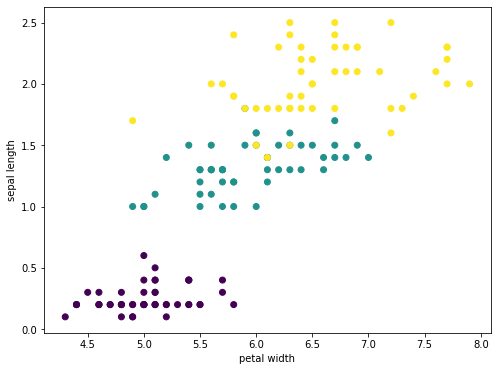

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X.iloc[:,0], X.iloc[:, 3], c=y)
ax.set_ylabel('sepal length')
ax.set_xlabel('petal width')

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

**K-means clustering:** 
Model that tries to cluster observations according to K. 

K can be chosen by us, or we can find the optimal value for K based on method that picks the value of K that gives the biggest reduction to variance.

Steps:

1) Randomly place K clusters.

2) Calculate the distance between each observation and each cluster. (euclidean distance).

3) Assign an observation to the cluster with the smallest distance.

4) Calculate the mean values of observations in each cluster.

5) Sum the variation in each cluster.

6) Now try a different set starting values -> and repeat.

7) We choose the iteration that has the lowest overall variation.




**How to choose optimal K**

Plot the reduction in variation per increase to K. Chose K that gives the highest reduction to variance. (think elbow plot).

We are using distance metrics and as such should scale our data. We do not want larger features unduly driving the distance metric, scaling means all features will be of equal importance.

In [28]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(X_scaled.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


Text(0.5, 0, 'petal width')

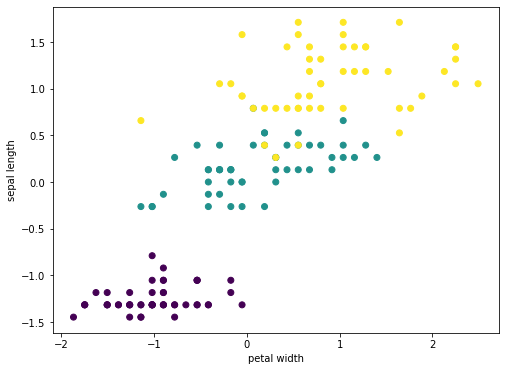

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:, 3], c=y)
ax.set_ylabel('sepal length')
ax.set_xlabel('petal width')

Lets see how the algorithm would cluster the iris data, if it didn't know which class each observation belong to, for different values of K.

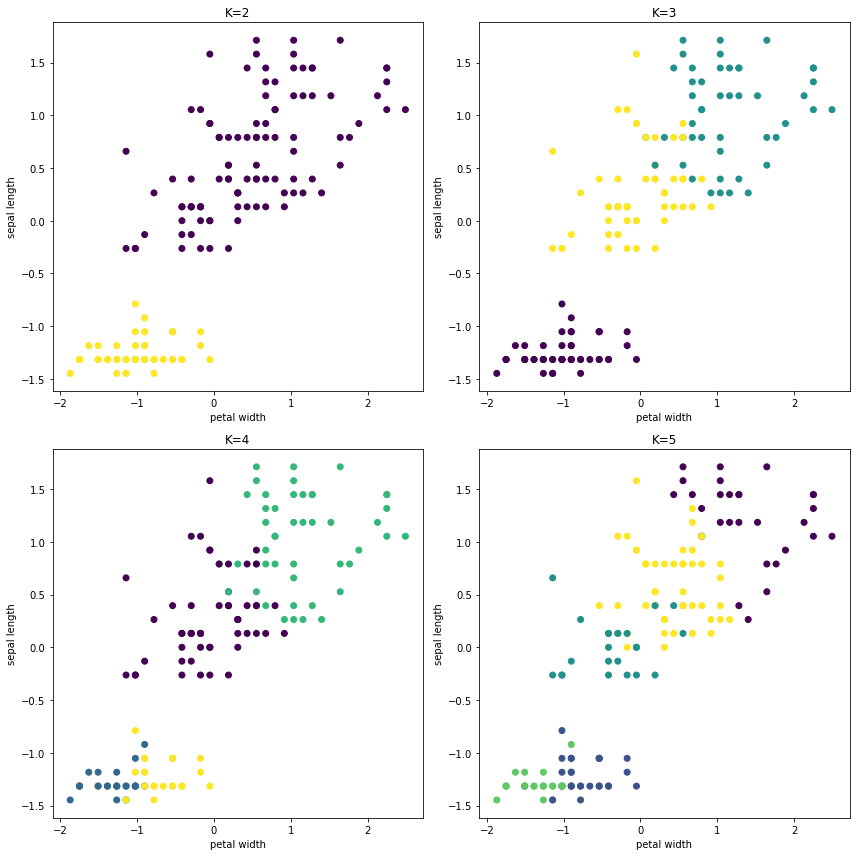

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

distortions = []

for k, ax in zip([2, 3, 4, 5], axes.flat):
    
    km = KMeans(n_clusters=k, )
    km.fit(X_scaled)
    preds = km.predict(X_scaled)
    distortions.append(km.inertia_)

    ax.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:, 3], c=preds)
    ax.set_ylabel('sepal length')
    ax.set_xlabel('petal width')
    ax.set_title(f'K={k}')
    
plt.tight_layout()

Demonstrating 'elbow method' for K

Optimal K is the point at the 'Elbow' -> which in this case is 3.

'inertia' is the in-cluster sum of squares (between Xi and mean(cluster))

In [56]:
distortions = []
for k in range(1, 20):
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    preds = km.predict(X_scaled)
    distortions.append(km.inertia_)

Text(0.5, 1.0, 'elbow plot')

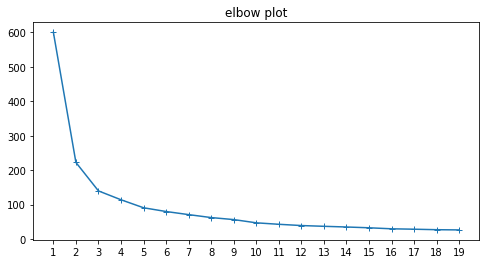

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(range(1, 20), distortions, marker='+')
ax.set_xticks(range(1, 20));
ax.set_title('elbow plot')